In [1]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
import rasterio as rio
from rasterio.features import geometry_mask
from rasterio.io import MemoryFile
from rasterio.plot import show
from rasterio.features import rasterize

In [2]:
font = {'family': 'ubuntu', 'weight': 'normal', 'size': 11}  # Modify family and size as needed
plt.rc('font', **font)

In [3]:
rios = gpd.read_file("../ide_0101_gd_hidro_otto_lin/ide_0101_gd_hidro_otto_lin.shp")


In [4]:
bq = gpd.read_file("../shapefile_bq/Barbacena/Barbacena_limitesPorSetorCensitario.shp")

In [ ]:
rios.plot()

<AxesSubplot:>

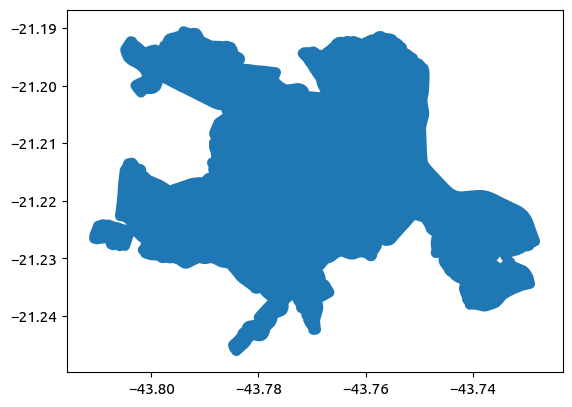

In [6]:
bq.plot()

In [7]:
rios = rios.to_crs('WGS84')

In [8]:
bq = bq.to_crs('WGS84')

In [9]:
rios_bq = rios.clip(bq)

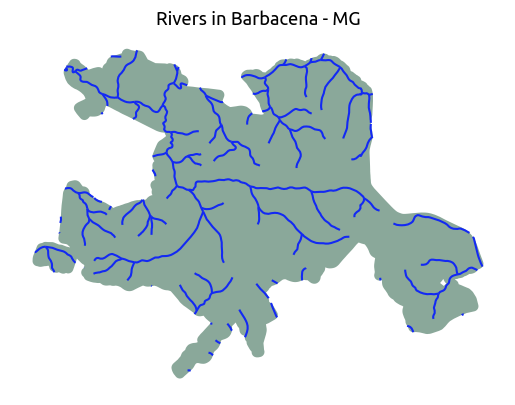

In [11]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

bq.plot(ax=ax, color='#8AA89A', label='bq')
rios_bq.plot(ax=ax, color='#1329F3')

plt.title("Rivers in Barbacena - MG", loc='center')
plt.axis('off')
#plt.savefig("imgs/rios_bq.png")
plt.show()

In [12]:
#rios_bq.to_file('../ide_0101_gd_hidro_otto_lin/riosBqRecortado.shp')  

In [14]:
raster_exemplo = rio.open('../srtm_region/barbacena_elevacao.tif')

In [17]:
from rasterio.features import rasterize
 

geom = [shapes for shapes in rios_bq.geometry]

rasterized = rasterize(geom,
                                out_shape = raster_exemplo.shape,
                                fill = 0,
                                out = None,
                                transform = raster_exemplo.transform,
                                all_touched = False,
                                default_value = 1,
                                dtype = None)

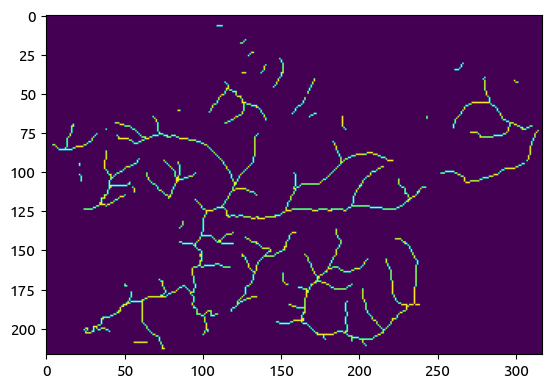

In [18]:
plt.imshow(rasterized, cmap = 'viridis')
plt.show()

In [20]:
metadados = rio.open('../srtm_region/barbacena_elevacao.tif')

# Write to TIFF
kwargs = metadados.meta
kwargs.update(
    dtype=rio.float32,
    count=1,
    #compress='lzw'
    )

with rio.open('rios_rasterizado.tiff', 'w', **kwargs) as dst:
    dst.write_band(1, rasterized.astype(rio.float32))

In [113]:
from rasterio.features import geometry_mask

In [29]:
pufavo = rio.open('calculo.tiff')

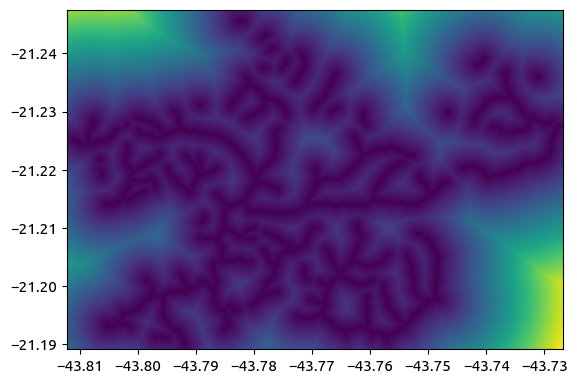

In [30]:
show(pufavo)
plt.show()

In [27]:
from rasterio.mask import mask

In [75]:

def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

coords = getFeatures(bq)

out_img, out_transform = mask(dataset=pufavo, shapes=coords, crop=True, filled = False)

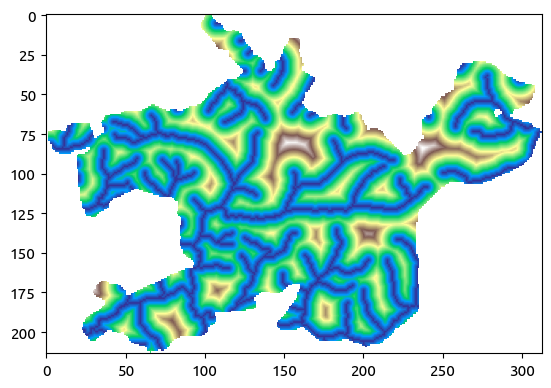

In [76]:
show(out_img, cmap = 'terrain')
plt.show()

In [78]:
out_img = np.squeeze(out_img)

In [79]:
kwargs = pufavo.meta
kwargs.update(
    dtype=rio.float32,
    count=1,
    #compress='lzw'
    )

with rio.open('../ide_0101_gd_hidro_otto_lin/proximity_rivers.tiff', 'w', **kwargs) as dst:
    dst.write_band(1, out_img.astype(rio.float32))

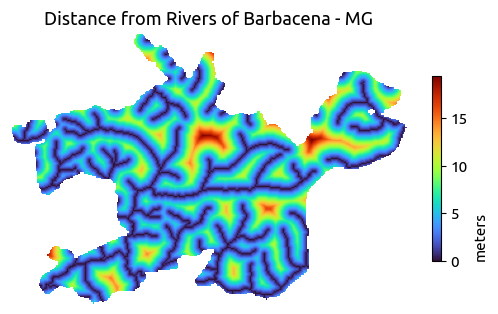

In [101]:
plt.imshow(out_img, cmap = 'turbo')
cbar = plt.colorbar(shrink=0.5)
cbar.set_label('meters', loc = 'bottom')
plt.title("Distance from Rivers of Barbacena - MG", loc='center')
plt.axis('off')
plt.savefig("imgs/distance_rivers.png")
plt.show()
